In [1]:
#importing all the libariries that needed to run the prediction model
import pandas as pd
import numpy as np
#sklearn libary importing support vector regression
from sklearn.svm import SVR
#importing linear regression
from sklearn.linear_model import LinearRegression
#importing matplotlib to plot the graph
import matplotlib.pyplot as plt
#importing KneighborClassfier from sklearn
from sklearn.neighbors import KNeighborsClassifier
#Importing metrics for the accuracy
from sklearn.metrics import accuracy_score
from pandas_datareader import data as pdr

C:\Users\rony1\anaconda3\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [2]:
pwd


'C:\\Users\\rony1'

In [3]:
cd C:\Users\rony1\newfolder3

C:\Users\rony1\newfolder3


In [4]:
#predicting the company REGN by reading the csv. we taking a month of data to predict.
REGN = pd.read_csv('Regn.csv')
REGN.head(22)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-03-02,445.000000,465.510010,445.000000,464.750000,464.750000,1713100
1,2020-03-03,454.720001,467.690002,448.109985,461.549988,461.549988,1210600
2,2020-03-04,467.959991,494.559998,467.130005,493.480011,493.480011,1960700
3,2020-03-05,480.940002,500.000000,480.000000,488.170013,488.170013,1270200
4,2020-03-06,477.290009,496.989990,477.000000,494.429993,494.429993,1130700
5,2020-03-09,466.940002,486.690002,466.149994,474.440002,474.440002,1344100
6,2020-03-10,488.450012,488.709991,460.799988,475.019989,475.019989,1390500
7,2020-03-11,479.109985,485.980011,459.609985,464.700012,464.700012,1351800
8,2020-03-12,444.359985,451.959991,426.100006,431.890015,431.890015,1627800
9,2020-03-13,445.010010,466.040009,418.010010,465.549988,465.549988,1380700


In [5]:
#we need to create the dataset of x and y which is the two data set we going to take to predict the model
#so we have to take the date and we taking the "Close" cloumn
dates = []
prices = []
REGN.tail(1)

,Date,Open,High,Low,Close,Adj Close,Volume
21,2020-03-31,474.0,495.480011,463.799988,488.290009,488.290009,1953200


In [6]:
# retriving the data until the last row
REGN = REGN.head(len(REGN)-1)
REGN

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-03-02,445.000000,465.510010,445.000000,464.750000,464.750000,1713100
1,2020-03-03,454.720001,467.690002,448.109985,461.549988,461.549988,1210600
2,2020-03-04,467.959991,494.559998,467.130005,493.480011,493.480011,1960700
3,2020-03-05,480.940002,500.000000,480.000000,488.170013,488.170013,1270200
4,2020-03-06,477.290009,496.989990,477.000000,494.429993,494.429993,1130700
5,2020-03-09,466.940002,486.690002,466.149994,474.440002,474.440002,1344100
6,2020-03-10,488.450012,488.709991,460.799988,475.019989,475.019989,1390500
7,2020-03-11,479.109985,485.980011,459.609985,464.700012,464.700012,1351800
8,2020-03-12,444.359985,451.959991,426.100006,431.890015,431.890015,1627800
9,2020-03-13,445.010010,466.040009,418.010010,465.549988,465.549988,1380700


In [7]:
REGN_dates = REGN.loc[:, 'Date']
#Getting  all of the rows from the Close Column
REGN_open = REGN.loc[:, 'Close']

In [9]:
#building  the independent data set for x
for date in REGN_dates:
 dates.append( [int(date.split('-')[2])])
  
#building the dependent data set for y
for Close_price in REGN_open:
  prices.append(float(Close_price))
#printing all the dates 
print(dates)

[[2], [3], [4], [5], [6], [9], [10], [11], [12], [13], [16], [17], [18], [19], [20], [23], [24], [25], [26], [27], [30]]


In [10]:
#prediction model to build the relationship between x and y to do a prediction
def predict_prices(dates, prices, x):
  
  #Creating the  Support Vector Regression model
  svr_lin = SVR(kernel='linear', C= 1e3)
  svr_poly= SVR(kernel='poly', C=1e3, degree=2)
  svr_rbf = SVR(kernel='rbf', C=1e3, gamma='auto')
  
  #TRAINING THE DATA SET TO GET THE MODEL OF PREDICTION 
  svr_lin.fit(dates,prices)
  svr_poly.fit(dates,prices)
  svr_rbf.fit(dates,prices)
  
  #creating rhe model of LR
  lin_reg = LinearRegression()
  #Trainning the model
  lin_reg.fit(dates,prices)
  
  #Plot the models on a graph to see which has the best fit
  plt.scatter(dates, prices, color='black', label='Data')
  plt.plot(dates, svr_rbf.predict(dates), color='red', label='SVR RBF')
  plt.plot(dates, svr_poly.predict(dates), color='blue', label='SVR Poly')
  plt.plot(dates, svr_lin.predict(dates), color='green', label='SVR Linear')
  plt.plot(dates, lin_reg.predict(dates), color='orange', label='Linear Reg')
  plt.xlabel('Days')
  plt.ylabel('Price')
  plt.title('SVR MODEL')
  plt.legend()
  plt.show()
  
  return svr_rbf.predict(x)[0], svr_lin.predict(x)[0],svr_poly.predict(x)[0],lin_reg.predict(x)[0]

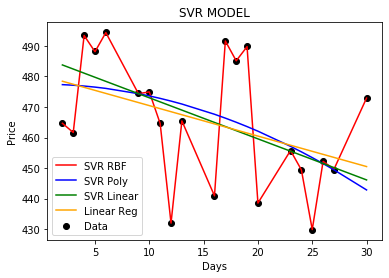

(440.9303117224959, 464.93500350002967, 467.61140700766276, 464.4564005000319)


In [11]:
#Predict the price of Regeneron Inc on day 
predicted_price = predict_prices(dates, prices, [[16]])
print(predicted_price)


USING KNN ALGORITHEM

In [12]:
REGN

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-03-02,445.000000,465.510010,445.000000,464.750000,464.750000,1713100
1,2020-03-03,454.720001,467.690002,448.109985,461.549988,461.549988,1210600
2,2020-03-04,467.959991,494.559998,467.130005,493.480011,493.480011,1960700
3,2020-03-05,480.940002,500.000000,480.000000,488.170013,488.170013,1270200
4,2020-03-06,477.290009,496.989990,477.000000,494.429993,494.429993,1130700
5,2020-03-09,466.940002,486.690002,466.149994,474.440002,474.440002,1344100
6,2020-03-10,488.450012,488.709991,460.799988,475.019989,475.019989,1390500
7,2020-03-11,479.109985,485.980011,459.609985,464.700012,464.700012,1351800
8,2020-03-12,444.359985,451.959991,426.100006,431.890015,431.890015,1627800
9,2020-03-13,445.010010,466.040009,418.010010,465.549988,465.549988,1380700


In [13]:
REGN['Open-Close'] = REGN.Open -REGN.Close
REGN['High-Low'] = REGN.High -REGN.Low
REGN = REGN.dropna()
X= REGN[['Open-Close', 'High-Low']]
X.head()

,Open-Close,High-Low
0,-19.750000,20.510010
1,-6.829987,19.580017
2,-25.520020,27.429993
3,-7.230011,20.000000
4,-17.139984,19.989990


In [14]:
Y= np.where(REGN['Close'].shift(-1)>REGN['Close'],1,-1)

In [15]:
split_percentage = 0.5
split = int(split_percentage*len(REGN))

X_train = X[:split]
Y_train = Y[:split]

X_test = X[:split]
Y_test = Y[:split]

In [17]:
knn = KNeighborsClassifier(n_neighbors=10)

knn.fit(X_train, Y_train)

accuracy_train = accuracy_score(Y_train, knn.predict(X_train))
accuracy_test = accuracy_score(Y_test, knn.predict(X_test))

In [18]:
print(accuracy_train)
print(accuracy_test)

0.6
0.6
